In [88]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor

### Generating a Linear Dataset
We will create a dummy dataset with $1$ feature and $1$ target variable. There will be a linear relationship between the feature and the target, but with some noise added to it.

In [89]:
# Feature
X = 2 * np.random.rand(100, 1)
# Target
# The relationship is y = 3x + 4 + some random noise
y = 4 + 3 * X + np.random.randn(100, 1)

As you can see below, the relationship between the feature and the target is not perfectly linear. However, it is evident that there is an overall linear trend among them. For example, as the value of $X$ increases, the value of $y$ also increases linearly.

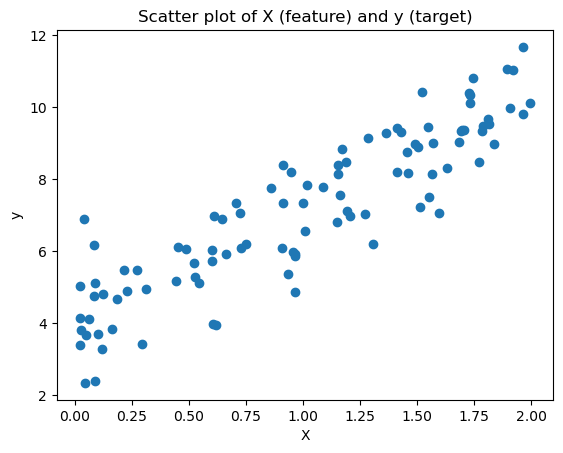

In [90]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of X (feature) and y (target)")
plt.show()

### Linear Model Using Normal Equation
We will be using the `LinearRegression` class from `sklearn` module to develop a linear model. You can find more about the available parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [91]:
model = LinearRegression(
    fit_intercept=False,
    copy_X=True,
    n_jobs=8,
    positive=True
)

In [92]:
model.fit(X, y)

LinearRegression(fit_intercept=False, n_jobs=8, positive=True)

In [93]:
model.coef_

array([[6.04563926]])

In [94]:
model.intercept_

0.0

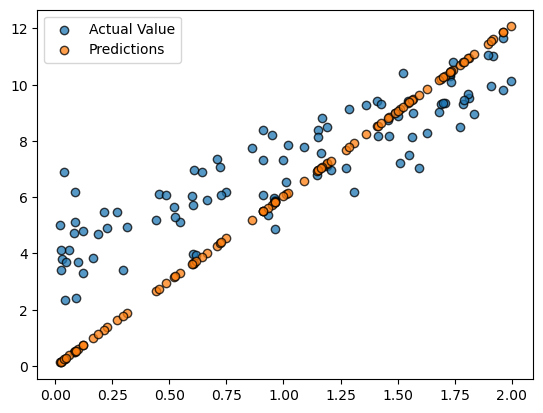

In [95]:
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.75, edgecolors='black', label='Actual Value')
plt.scatter(X, predictions, alpha=0.75, edgecolors='black', label='Predictions')
plt.legend()
plt.show()

### Linear Model Using Gradient Descent

Next, we will build a linear model using stochastic gradient descent. We will use the `SGDRegressor` from `sklearn` module. You will find more about the available parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).

In [96]:
model2 = SGDRegressor(
    fit_intercept=False,
    loss='squared_error',
    penalty='l1',
    alpha=0.5,
    max_iter=500,
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-3,
    learning_rate='constant',
    eta0=0.01,
    verbose=2
)

In [97]:
model2.fit(X, y)

-- Epoch 1
Norm: 4.27, NNZs: 1, Bias: 0.000000, T: 90, Avg. loss: 12.905061
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.80, NNZs: 1, Bias: 0.000000, T: 180, Avg. loss: 4.063363
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.49, NNZs: 1, Bias: 0.000000, T: 270, Avg. loss: 3.022187
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.97, NNZs: 1, Bias: 0.000000, T: 360, Avg. loss: 2.878635
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.31, NNZs: 1, Bias: 0.000000, T: 450, Avg. loss: 2.802809
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.68, NNZs: 1, Bias: 0.000000, T: 540, Avg. loss: 2.832470
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.01, NNZs: 1, Bias: 0.000000, T: 630, Avg. loss: 2.819996
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.32, NNZs: 1, Bias: 0.000000, T: 720, Avg. loss: 2.814744
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.63, NNZs: 1, Bias: 0.000000, T: 810, Avg. loss: 2.818546
Total training time: 0.00 seconds.
-

c:\Users\musab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.5, early_stopping=True, fit_intercept=False,
             learning_rate='constant', max_iter=500, n_iter_no_change=10,
             penalty='l1', verbose=2)

In [98]:
model2.coef_

array([5.70866978])

In [99]:
model2.intercept_

array([0.])

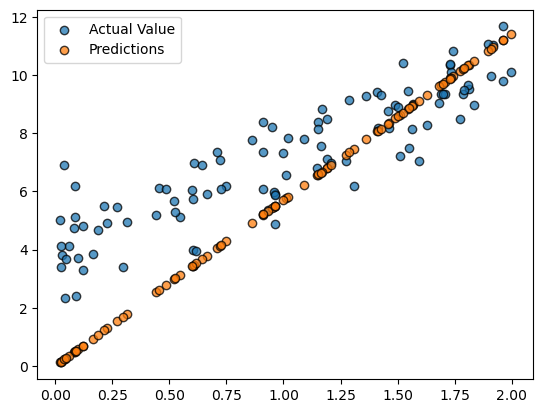

In [100]:
predictions = model2.predict(X)

plt.scatter(X, y, alpha=0.75, edgecolors='black', label='Actual Value')
plt.scatter(X, predictions, alpha=0.75, edgecolors='black', label='Predictions')
plt.legend()
plt.show()

### Generating a Non-Linear Dataset
We will create a dummy dataset with $1$ feature and $1$ target variable. There will be a non-linear relationship between the feature and the target, and with some noise added to it.

In [101]:
# total data
m = 100
# feature
X = 6 * np.random.rand(m, 1) - 3
# target
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

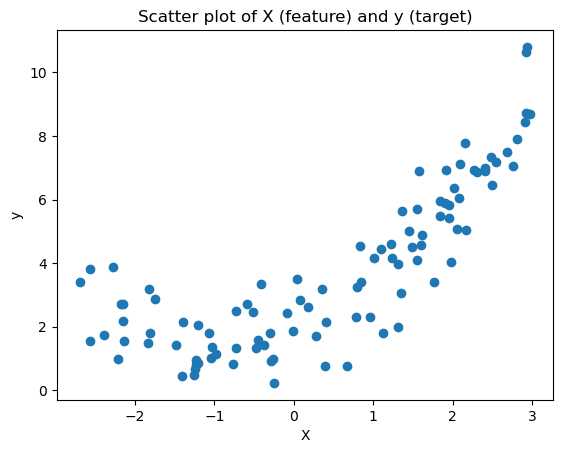

In [102]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of X (feature) and y (target)")
plt.show()

Converting $X$ into polynomial form. For this example, we will convert it to a $3$ degree polynomial. We will use the `PolynomialFeatures` class from `sklearn` and use the `degree` parameter to set the desired degree.

In [103]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [104]:
model3 = SGDRegressor(
    fit_intercept=False,
    loss='squared_error',
    penalty='l1',
    alpha=0.5,
    max_iter=500,
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-3,
    learning_rate='constant',
    eta0=0.01,
    verbose=2
)

In [105]:
model3.fit(X_poly, y)

-- Epoch 1
Norm: 3.12, NNZs: 3, Bias: 0.000000, T: 90, Avg. loss: 14.376307
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.96, NNZs: 3, Bias: 0.000000, T: 180, Avg. loss: 2.876092
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.59, NNZs: 3, Bias: 0.000000, T: 270, Avg. loss: 3.998234
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.94, NNZs: 3, Bias: 0.000000, T: 360, Avg. loss: 2.084774
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.70, NNZs: 3, Bias: 0.000000, T: 450, Avg. loss: 2.777336
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.15, NNZs: 2, Bias: 0.000000, T: 540, Avg. loss: 2.529646
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.85, NNZs: 3, Bias: 0.000000, T: 630, Avg. loss: 2.915569
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.09, NNZs: 2, Bias: 0.000000, T: 720, Avg. loss: 1.881636
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.38, NNZs: 2, Bias: 0.000000, T: 810, Avg. loss: 1.807109
Total training time: 0.00 seconds.
-

c:\Users\musab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.5, early_stopping=True, fit_intercept=False,
             learning_rate='constant', max_iter=500, n_iter_no_change=10,
             penalty='l1', verbose=2)

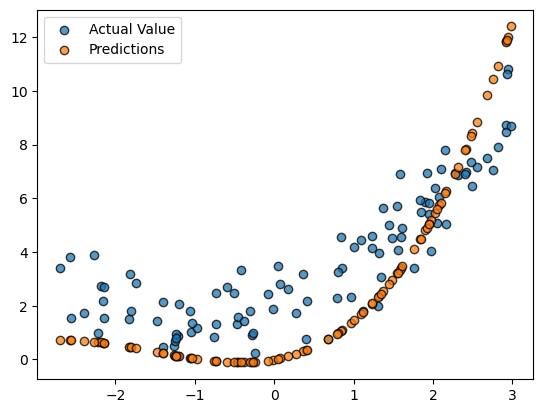

In [106]:
predictions = model3.predict(X_poly)

plt.scatter(X, y, alpha=0.75, edgecolors='black', label='Actual Value')
plt.scatter(X, predictions, alpha=0.75, edgecolors='black', label='Predictions')
plt.legend()
plt.show()